# Análisis de datos

En este último apartado, tras scrapear y limpiar los datos, se buscará analizarlos mediante planteo de preguntas, consultas y gráficos para contestarlas.

## Importamos las librerías necesarias

Usamos Pandas para consultas. Mientras que Matplotlib y Seaborn son para gráficas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importamos los registros limpios y los exhibimos

Se establece que los números flotantes, tanto los campos del dataframe o los campos generados (como el promedio), solo exhiban 1 decimal para mejor lectura.

In [2]:
df = pd.read_csv('Monitores Nuevos - Registros limpios - Mercado Libre Argentina - Agosto 2023.csv', index_col= 0)

pd.set_option('display.float_format', '{:.1f}'.format)

df.head()

,Marca,Modelo,Tamaño de la pantalla,Tipo de resolución,Tipo de pantalla,Frecuencia de actualización,Precio,Link
0,Philips,271E1SCA/55,27.0,FHD,LCD/LED,75,185999,https://www.mercadolibre.com.ar/monitor-gamer-...
1,Samsung,F24T35,24.0,FHD,LCD/LED,75,86999,https://www.mercadolibre.com.ar/monitor-gamer-...
2,Samsung,F22T35,22.0,FHD,LCD/LED,75,75999,https://www.mercadolibre.com.ar/monitor-gamer-...
3,Noblex,MK24X7100,23.8,FHD,LCD/LED,75,66990,https://www.mercadolibre.com.ar/monitor-led-no...
4,Philips,221V8,21.5,FHD,LCD/LED,75,51499,https://www.mercadolibre.com.ar/monitor-gamer-...


# Información General

## Cantidad de registros: 1234

In [3]:
len(df)

1234

## Cinco marcas con mayor presencia:

Las cinco marcas con más apariciones en el sitio son:

1. LG: 324 veces
2. Samsung: 297 veces
3. Philips: 135 veces
4. ViewSonic: 73 veces
5. Asus: 68 veces

In [4]:
df['Marca'].value_counts()[range(5)]

LG           324
Samsung      297
Philips      135
ViewSonic     73
Asus          68
Name: Marca, dtype: int64

## Cinco marcas con mayor presencia: Promedio más bajo de precios

<p>De las cinco marcas con mayor presencia, Philips es la más barata en promedio con ARS 89.105,30</p>

In [5]:
cincoMarcasConMayorPresencia = ['LG','Samsung','Philips','ViewSonic','Asus']
df[df['Marca'].isin(cincoMarcasConMayorPresencia)][['Marca','Precio']].groupby('Marca').mean().sort_values(by='Precio')

,Precio
Marca,
Philips,89105.3
Samsung,180495.3
ViewSonic,181476.7
Asus,222614.3
LG,258425.9


## Modelo de monitor con más presencia:

El modelo con más presencia en el sitio es el 'F24T35' de la marca Samsung con 81 apariciones.

In [6]:
df['Modelo'].value_counts()[range(3)]

F24T35    81
F22T35    47
19M38A    41
Name: Modelo, dtype: int64

In [7]:
df[(df['Modelo']=='F24T35')][['Marca']].head(1)

,Marca
1,Samsung


## Modelo de monitor con más presencia: Variación de precios

El precio del monitor Samsung con el modelo 'F24T35' varía desde ARS 65.000 hasta ARS 271.667

In [8]:
print("Min:",df[(df['Modelo']=='F24T35')][['Precio']].min())
print("")
print("Max:",df[(df['Modelo']=='F24T35')][['Precio']].max())

Min: Precio    65000
dtype: int64

Max: Precio    271667
dtype: int64


## Rango de tamaños para monitores:

Los tamaños de monitor varían entre 18.5 " y 49 ". Hay 28 tamaños únicos para elegir.

In [9]:
print("Min:",df['Tamaño de la pantalla'].min())
print("Max:",df['Tamaño de la pantalla'].max())
print("Cantidad:",len(df['Tamaño de la pantalla'].unique()))

Min: 18.5
Max: 49.0
Cantidad: 28


## Rango de precios:

Los precios de los monitores varían entre ARS 37.000 y ARS 5.999.999 distribuidos entre 1066 precios únicos.

In [10]:
print("Min:",df['Precio'].min())
print("Max:",df['Precio'].max())
print("Cantidad:",len(df['Precio'].unique()))

Min: 37000
Max: 5999999
Cantidad: 1066


## Los tres monitores más baratos de todos:

Estos tres monitores son los más baratos de la lista. Se destaca que ninguno es FHD o Full High Definition. Sus precios rondan entre ARS 37.000 y ARS 44.800

In [11]:
df.sort_values(by='Precio').head(3)

,Marca,Modelo,Tamaño de la pantalla,Tipo de resolución,Tipo de pantalla,Frecuencia de actualización,Precio,Link
1432,iQual,Home19,19.0,HD,LCD/LED,75,37000,https://articulo.mercadolibre.com.ar/MLA-14288...
1754,Gfast,T-195,19.5,HD,LCD/LED,60,39999,https://articulo.mercadolibre.com.ar/MLA-14652...
1775,HP,V190,18.5,WXGA,LCD/LED,60,44800,https://www.mercadolibre.com.ar/monitor-hp-v19...


## Los tres monitores más caros de todos:

<p>Todos coinciden con la marca Apple. Todos tienen resoluciones UHD (Ultra High Definition). Y sus precios van entre ARS 5.000.000 y ARS 6.000.000</p>

In [12]:
df.sort_values(by='Precio', ascending = False).head(3)

,Marca,Modelo,Tamaño de la pantalla,Tipo de resolución,Tipo de pantalla,Frecuencia de actualización,Precio,Link
1611,Apple,XDR NANO,32.0,UHD 6K,LCD/LED,60,5999999,https://articulo.mercadolibre.com.ar/MLA-11874...
1672,Apple,XDR STANDARD,32.0,UHD 6K,LCD/LED,60,5599999,https://articulo.mercadolibre.com.ar/MLA-11874...
1673,Apple,XDR NANO,27.0,UHD 5K,LCD/LED,60,4999999,https://articulo.mercadolibre.com.ar/MLA-11000...


## ¿Cuál es la mejor opción con ARS 100.000?

Se estableció un presupuesto de ARS 100.000 y se planteó encontrar el mejor monitor. Se determina que "lo mejor" es:

<ul>
    <li>
        Mayor tamaño posible.
    </li>    
    <li>
        Mayor frecuencia posible.
    </li>
    <li>
        Mayor resolución posible.
    </li>
</ul>


Primero, queremos saber cuántas opciones hay bajo este precio.

In [13]:
len(df[(df['Precio']<=100000)])

454

Se disponen de 454 monitores menores o iguales a ARS 100.000.

Ahora queremos averiguar cuales son las resoluciones disponibles en esta selección:

In [14]:
df[(df['Precio']<=100000)]['Tipo de resolución'].unique()

array(['FHD', 'WXGA', 'HD', 'HD+'], dtype=object)

Se disponen de cuatro resoluciones: FHD, WXGA, HD y HD+

Tomamos FHD por ser la mayor resolución.

Lo siguiente es observar los tamaños de pantalla disponibles aplicando el filtro de resolución a la consulta:

In [15]:
df[(df['Precio']<=100000) &
   (df['Tipo de resolución']=='FHD')]['Tamaño de la pantalla'].unique()

array([24.  , 22.  , 23.8 , 21.5 , 18.5 , 27.  , 21.45, 23.6 , 20.  ,
       19.5 ])

Se disponen de varios tamaños en pulgadas: 24, 22, 23.8, 21.5, 18.5, 27, 21.45, 23.6, 20, y 19.5

El tamaño más grande para el presupuesto es de 27 "

Ahora buscaremos la frecuencia más alta posible. Debemos saber cuáles son las frecuencias únicas en esta consulta, aplicando el filtro de tamaño:

In [16]:
df[(df['Precio']<=100000) & 
   (df['Tipo de resolución']=='FHD') &
   (df['Tamaño de la pantalla']==27)]['Frecuencia de actualización'].unique()

array([75, 60], dtype=int64)

Tenemos dos frecuencias: 60 Hz y 75 Hz. Tomaremos la de 75 Hz por ser la más alta.

Finalmente, aplicamos la frecuencia a la búsqueda y obtenemos lo siguiente:

In [17]:
df[(df['Precio']<=100000) & 
   (df['Tipo de resolución']=='FHD') &
   (df['Frecuencia de actualización']==75) &
   (df['Tamaño de la pantalla']==27)]

,Marca,Modelo,Tamaño de la pantalla,Tipo de resolución,Tipo de pantalla,Frecuencia de actualización,Precio,Link
13,Philips,272V8LA/55,27.0,FHD,LCD/LED,75,99999,https://www.mercadolibre.com.ar/monitor-philip...
1112,Philips,272V8LA/55,27.0,FHD,LCD/LED,75,99933,https://articulo.mercadolibre.com.ar/MLA-11045...


Ambos monitores Philips son idénticos salvo en la pequeña diferencia en el precio de ARS 66. 

Termina la búsqueda del mejor monitor con un presupuesto de ARS 100.000 concluyendo que cualquiera de estas dos opciones es óptima.

# Aspectos Técnicos y de Rendimiento

## Resolución de pantalla más común: FHD (Full High Definition)

<p>La resolución de pantalla más común por diferencia es la resolución FHD o Full High Definition.</p>

<AxesSubplot:>

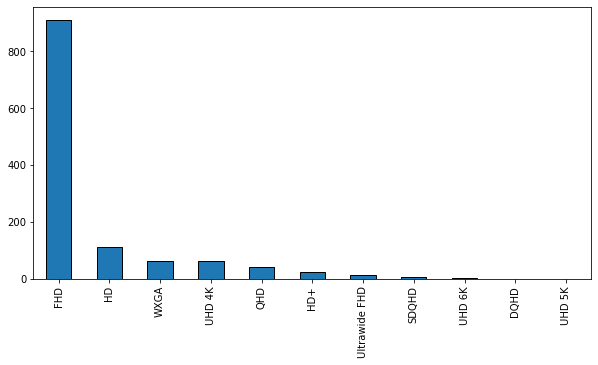

In [18]:
df['Tipo de resolución'].value_counts().plot.bar(figsize=(10,5),edgecolor='black')

## Tamaño de pantalla más común: 27 "

El tamaño más común de pantalla en este dataset es de 27 " con un poco más de 250 apariciones. En un cercano segundo lugar, el tamaño de 24 " está en aproximadamente 225 monitores.

<AxesSubplot:>

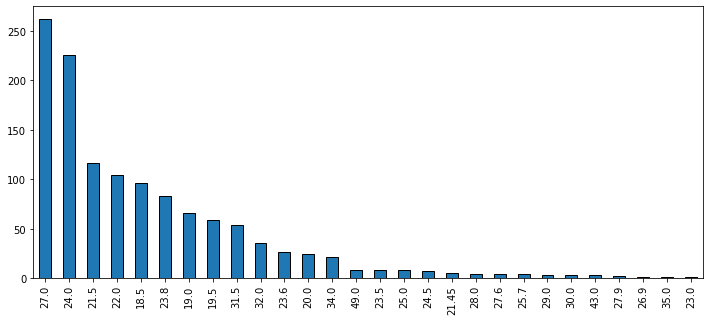

In [19]:
df['Tamaño de la pantalla'].value_counts().plot.bar(figsize=(12,5),edgecolor='black')

## Monitor más grande disponible: 49 "

Estas ocho publicaciones contienen los tres monitores con el mayor tamaño disponible. Tanto el modelo '49WL95C' de LG <a href='https://www.lg.com/ar/monitores/lg-49WL95C-W'>[1]</a> como los modelos 'C49J890DKL' <a href='https://www.samsung.com/co/support/model/LC49J890DKLXZL/'>[2]</a> y 'LC49G95TS' <a href='https://www.samsung.com/ar/support/model/LC49J890DKLXZB/'>[3]</a> de Samsung son monitores curvos.
<br>

Sus precios rondan entre ARS 820.000 y ARS 2.250.000

In [20]:
df[(df['Tamaño de la pantalla']==df['Tamaño de la pantalla'].max())]

,Marca,Modelo,Tamaño de la pantalla,Tipo de resolución,Tipo de pantalla,Frecuencia de actualización,Precio,Link
99,LG,49WL95C,49.0,QHD,LCD/LED,60,967999,https://www.mercadolibre.com.ar/monitor-gamer-...
201,Samsung,C49J890DKL,49.0,FHD,LCD/LED,144,823146,https://www.mercadolibre.com.ar/monitor-gamer-...
764,LG,49WL95C,49.0,QHD,LCD/LED,60,2249999,https://articulo.mercadolibre.com.ar/MLA-81667...
1128,LG,49WL95C,49.0,QHD,LCD/LED,60,1096345,https://articulo.mercadolibre.com.ar/MLA-90791...
1314,LG,49WL95C,49.0,QHD,LCD/LED,60,1549999,https://articulo.mercadolibre.com.ar/MLA-11062...
1444,Samsung,LC49G95TS,49.0,DQHD,QLED,240,999999,https://articulo.mercadolibre.com.ar/MLA-12743...
1605,LG,49WL95C,49.0,QHD,LCD/LED,60,1137983,https://articulo.mercadolibre.com.ar/MLA-12692...
1737,LG,49WL95C,49.0,QHD,LCD/LED,60,1516199,https://articulo.mercadolibre.com.ar/MLA-11311...


## Tipo de pantalla más común: LCD/LED

El tipo de pantalla más común es LCD/LED, cubriendo casi la totalidad del dataset.

Téngase presente que algunos vendedores publican sus monitores como LED puro cuando es LCD con retroiluminación LED. Debido a la falta de datos para saber de qué tecnología estamos hablando, se agrupó ambos tipos en una sola categoría. Más información en el archivo 'Limpieza del CSV'.

<AxesSubplot:>

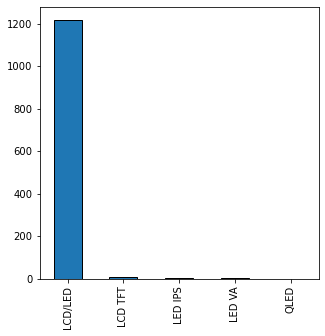

In [21]:
df['Tipo de pantalla'].value_counts().plot.bar(figsize=(5,5),edgecolor='black')

## Rango de frecuencias de actualización

La menor tasa de refresco encontrada en la lista es de 56 Hz, y la más alta de 360 Hz. Hay 11 frecuencias únicas.

In [22]:
print("Min:",df['Frecuencia de actualización'].min())
print("Max:",df['Frecuencia de actualización'].max())
print("Cantidad de datos únicos:",len(df['Frecuencia de actualización'].unique()))

Min: 56
Max: 360
Cantidad de datos únicos: 11


## Monitor o monitores con la mayor frecuencia de actualización:

<p>La mayor frecuencia de actualización disponible es 360 Hz y es compartido entre tres publicaciones; dos son el mismo monitor ViewSonic con distinto precio y el otro es marca ASUS. En resumen, sólo dos monitores tienen la mayor frecuencia.</p>

In [23]:
df[(df['Frecuencia de actualización']==df['Frecuencia de actualización'].max())]

,Marca,Modelo,Tamaño de la pantalla,Tipo de resolución,Tipo de pantalla,Frecuencia de actualización,Precio,Link
94,Asus,PG259QNR,24.5,FHD,LCD/LED,360,479000,https://www.mercadolibre.com.ar/monitor-gamer-...
534,ViewSonic,XG251G,24.5,FHD,LCD/LED,360,461219,https://articulo.mercadolibre.com.ar/MLA-12043...
844,ViewSonic,XG251G,24.5,FHD,LCD/LED,360,622639,https://articulo.mercadolibre.com.ar/MLA-12036...


# Precios

## Media de precios

El promedio de precios redondeado es ARS 209.958,95

In [24]:
df['Precio'].mean()

209958.9489465154

## Mediana de precios

La mediana de precios es ARS 130.299,0

In [25]:
df['Precio'].median()

130299.0

## Distribución de precios

### Caja y bigotes

Para una mejor visualización de la caja, el límite del eje 'y' llega hasta ARS 500.000 pero, en verdad, el gráfico continúa con valores atípicos hasta el ARS 5.999.999

<function matplotlib.pyplot.show(close=None, block=None)>

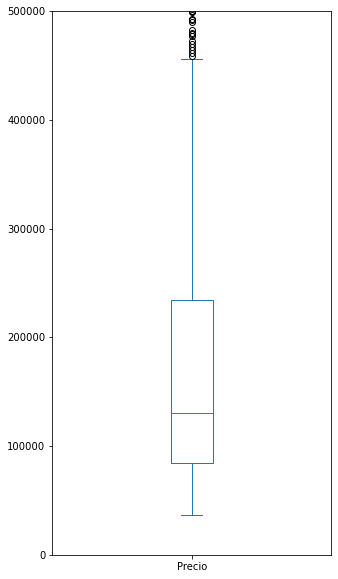

In [26]:
df['Precio'].plot.box(figsize=(5,10))
plt.ylim(0,500000)
plt.show

#### Observaciones

El bigote menor comienza en ARS 37.000 y el bigote mayor llega hasta aproximadamente ARS 460.000. 
<br>
El rango es: ARS 460.000 - ARS 37.000 ≈  ARS 423.000

Se observa que el 50% de los precios se encuentran entre aproximadamente ARS 80.000 (primer cuartil) y ARS 230.000 (tercer cuartil).
<br>
El rango intercuartílico es: Q3 - Q1 = ARS 230.000 - ARS 80.000 ≈ ARS 150.000

Los valores atípicos arrancan a partir de los ARS 460.000 y se extienden hasta ARS 5.999.999

Hay un empate técnico entre el primer y el segundo cuartil para ver cuál de los dos tiene menor dispersión de datos.

A simple vista, el cuarto cuartil tiene la mayor dispersión de datos.

Una mediana (raya verde) que tiende al valor del primer cuartil, en este caso ARS 80.000, indica que los datos están más concentrados de este lado y, por lo tanto, hay una distribución asimétrica hacia la izquierda.

### Histograma

<AxesSubplot:ylabel='Frequency'>

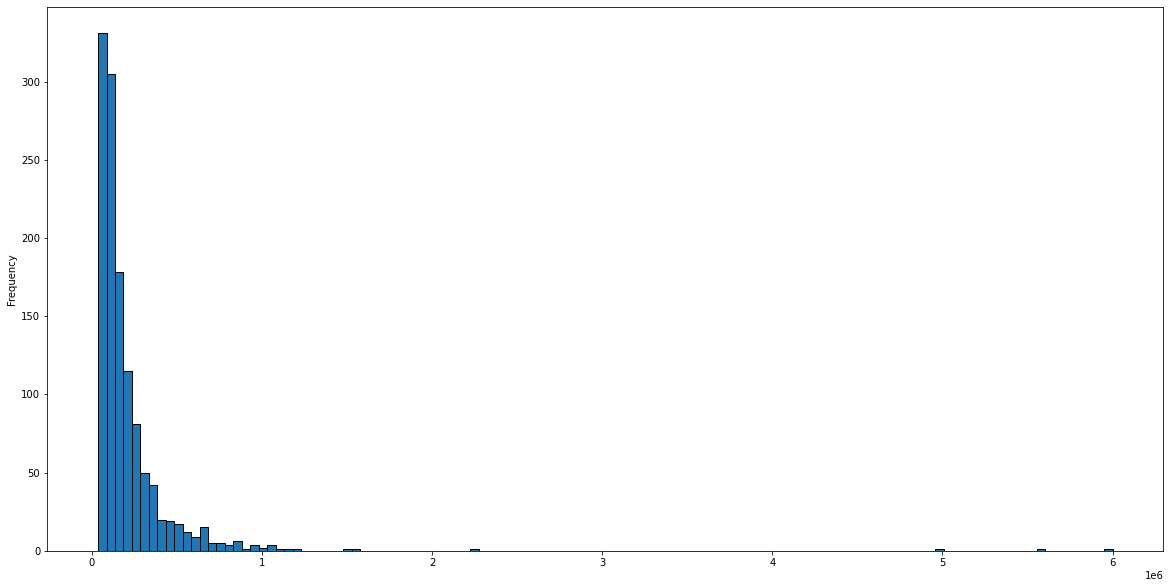

In [27]:
df['Precio'].plot.hist(figsize=(20,10),bins = 120, edgecolor='black')

#### Observaciones

Cada barra del histograma representa ARS 50.000

Similar al gráfico de cajas, la mayoría de los precios se concentran entre ARS 37.000 y ARS 250.000

Debido a que la media de precios (ARS 209.958,95) es mayor a la mediana (ARS 130.299,00), la distribución de los datos es asimétrica con un sesgo positivo hacia la izquierda. Es decir, el 50% de los datos se ubican más a la izquierda de la gráfica.

## Relación entre precio y tamaño de pantalla

<AxesSubplot:xlabel='Precio', ylabel='Tamaño de la pantalla'>

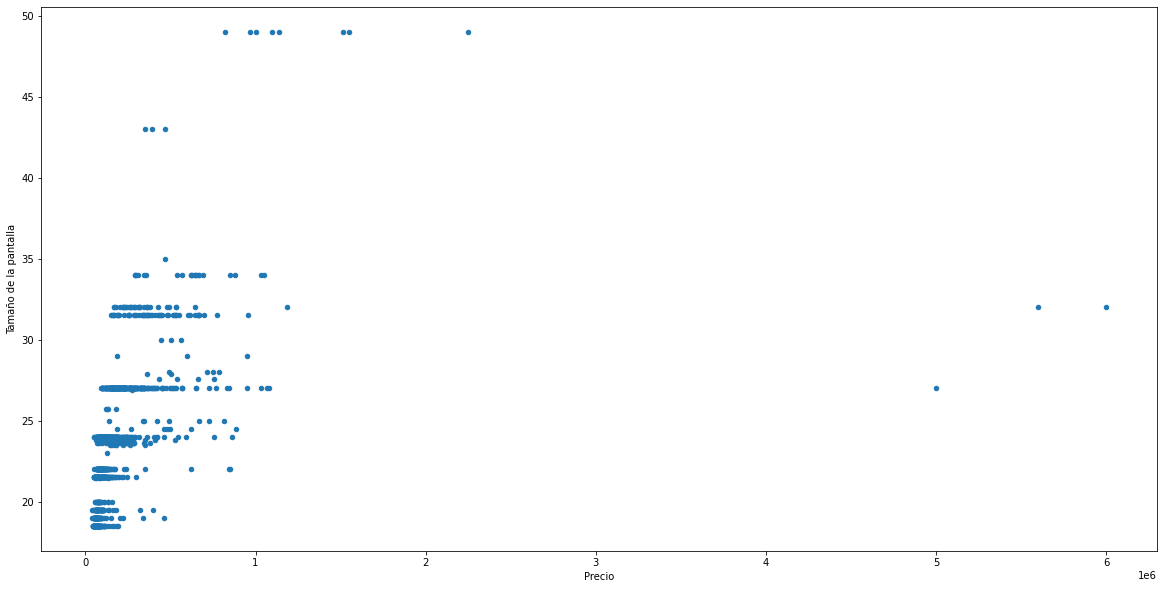

In [28]:
df[['Precio','Tamaño de la pantalla']].plot.scatter(x=0,y=1,figsize=(20,10))

# Variedad de características según marca

En este apartado, se busca determinar qué marca tiene más variedad según el campo especificado.

## Definimos la función

De cada marca, busca cuántos datos únicos tiene el campo que le pasemos por parámetro. La marca con la mayor cantidad (variedad) es la que se almacena. Si hay otra que la supere, se sobreescribe al igual que la cantidad.

In [29]:
def marcaConMayorVariedad(campo):
    marca = ''
    mayorCantidad = 0    
    for x in df['Marca'].unique():
        cantidadCamposUnicos = len(df[(df['Marca'] == x)][campo].unique())
        if cantidadCamposUnicos > mayorCantidad:
            mayorCantidad = cantidadCamposUnicos
            marca = x
    return list((marca,mayorCantidad))
    

## Marca con mayor variedad de modelos:

<p>La marca con mayor variedad de modelos es Samsung con 60 modelos diferentes.</p>

In [30]:
marcaConMayorVariedad('Modelo')

['Samsung', 60]

## Marca con mayor variedad de tamaños:

<p>La marca con mayor variedad de tamaños es LG con 20 tamaños diferentes.</p>

In [31]:
marcaConMayorVariedad('Tamaño de la pantalla')

['LG', 20]

## Marca con mayor variedad de resoluciones de pantalla:

<p>La marca con mayor variedad de resoluciones es LG con 7 resoluciones diferentes.</p>

In [32]:
marcaConMayorVariedad('Tipo de resolución')

['LG', 7]

## Marca con mayor variedad de tipos de pantalla:

<p>La marca con mayor variedad de tipos de pantalla es Samsung con 4 tipos diferentes.</p>

In [33]:
marcaConMayorVariedad('Tipo de pantalla')

['Samsung', 4]